In [47]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy
import librosa.display
from IPython.display import Audio
import aubio

In [48]:
def load_audio_file(file_path):
    input_length = 16000
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data

In [49]:
data = load_audio_file("../rosa31/Desktop/ROSA/deepvoice3_pytorch/output_dir/input.wav")

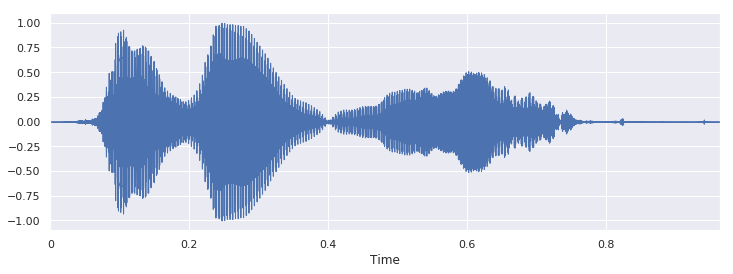

In [77]:
audio = '../rosa31/Desktop/ROSA/deepvoice3_pytorch/output_dir/input.wav'
samples, sample_rate = librosa.load(audio)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples, sr=sample_rate)
plt.show()

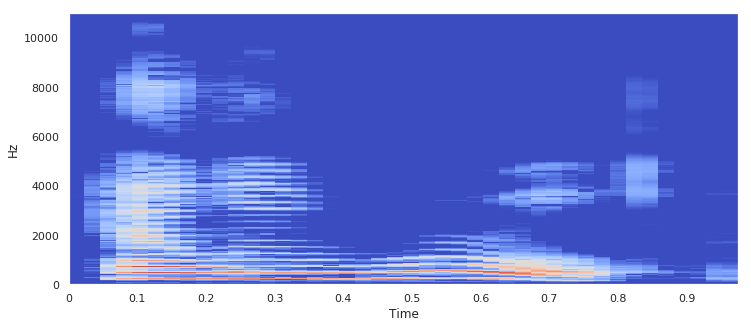

In [46]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.show()

In [78]:
y_pitch_speed = samples.copy()
length_change = np.random.uniform(low=0.5,high=1.5)
speed_fac = 1.0  / length_change
print("resample length_change = ",length_change)
tmp = np.interp(np.arange(0,len(y_pitch_speed),speed_fac),np.arange(0,len(y_pitch_speed)),y_pitch_speed)
minlen = min(y_pitch_speed.shape[0], tmp.shape[0])
y_pitch_speed *= 0
y_pitch_speed[0:minlen] = tmp[0:minlen]
Audio(y_pitch_speed, rate=sample_rate)

resample length_change =  0.8216542565353923


In [79]:
y_pitch = samples.copy()
bins_per_octave = 24
pitch_pm = 4

pitch_change = -4
print("pitch_change = ",pitch_change)
y_pitch = librosa.effects.pitch_shift(y_pitch.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
Audio(y_pitch, rate=sample_rate)


pitch_change =  -4


In [80]:
y_pitch = samples.copy()
bins_per_octave = 24
pitch_pm = 4
# pitch_change =  pitch_pm * 2*(np.random.uniform()-0.5)   
pitch_change = 5

print("pitch_change = ",pitch_change)
y_pitch = librosa.effects.pitch_shift(y_pitch.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
Audio(y_pitch, rate=sample_rate)

pitch_change =  5


In [82]:
y_shift = samples.copy()
timeshift_fac = 0.2 *2*(np.random.uniform()-0.5)  # up to 20% of length
print("timeshift_fac = ",timeshift_fac)
start = int(y_shift.shape[0] * timeshift_fac)
print(start)
if (start > 0):
    y_shift = np.pad(y_shift,(start,0),mode='constant')[0:y_shift.shape[0]]
else:
    y_shift = np.pad(y_shift,(0,-start),mode='constant')[0:y_shift.shape[0]]
Audio(y_shift, rate=sample_rate)

timeshift_fac =  0.15132544193158673
3215
